In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salaly-prediction-for-beginer/Salary Data.csv
/kaggle/input/salary-data-with-age-and-experience/Salary_Data.csv


## import required libraries

In [27]:
import pandas as pd # for data proccessing
import numpy as np # linear algebra
import matplotlib.pyplot as plt #for visualazing
import seaborn as sns

### basic EDA

In [28]:
# read the dataset
df = pd.read_csv('/kaggle/input/salary-data-with-age-and-experience/Salary_Data.csv')
# the first 5 rows of the dataset
df.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [29]:
# shape and soize of dataset
print(f" size  : {df.size}")
print(f"shape : {df.shape} ")

 size  : 90
shape : (30, 3) 


In [30]:
# a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Age              30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [31]:
# basic stats
df.describe()

,YearsExperience,Age,Salary
count,30.000000,30.000000,30.000000
mean,5.313333,27.216667,76003.000000
std,2.837888,5.161267,27414.429785
min,1.100000,21.000000,37731.000000
25%,3.200000,23.300000,56720.750000
50%,4.700000,25.000000,65237.000000
75%,7.700000,30.750000,100544.750000
max,10.500000,38.000000,122391.000000


## data visualization

Text(0.5, 1.0, 'salary variation depending on Age')

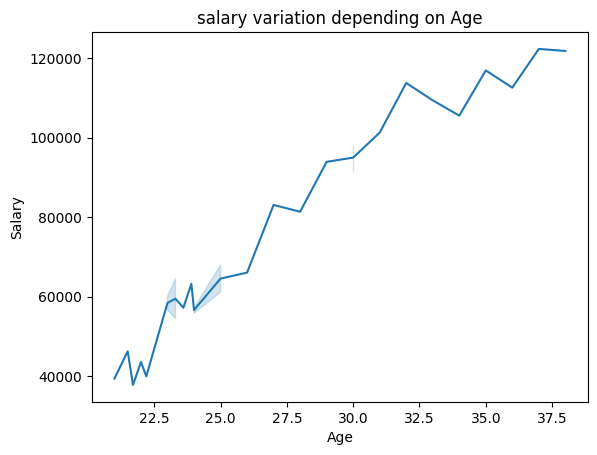

In [51]:
sns.lineplot(data=df,x='Age',y='Salary')
plt.title('salary variation depending on Age')

Text(0.5, 1.0, 'salary variation depending on Years of Experience')

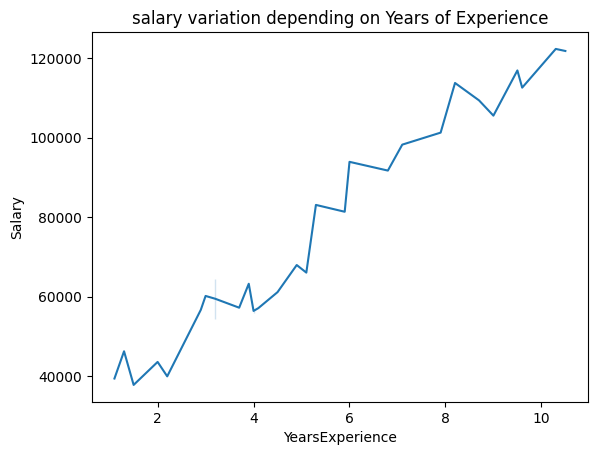

In [52]:
sns.lineplot(data=df , x='YearsExperience',y='Salary')
plt.title('salary variation depending on Years of Experience')

<AxesSubplot: xlabel='YearsExperience', ylabel='Salary'>

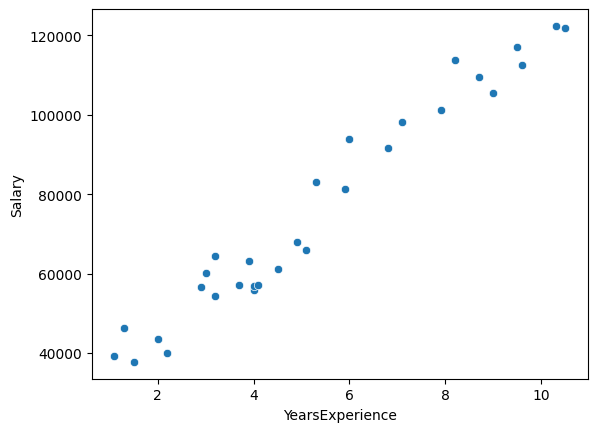

In [34]:
sns.scatterplot(data=df,x='YearsExperience',y='Salary')
plt.title('salary distribution depending on Years of Experience')

<AxesSubplot: xlabel='YearsExperience', ylabel='Salary'>

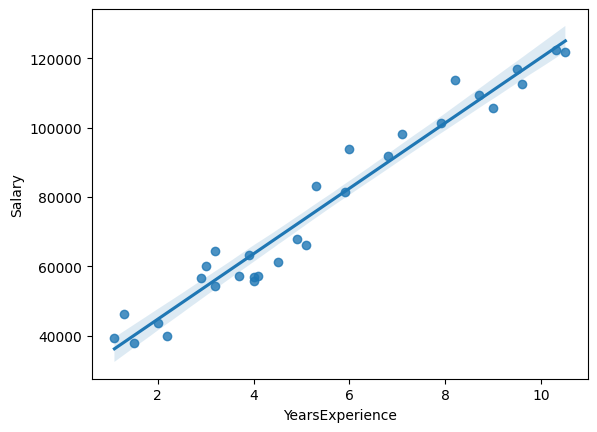

In [35]:
sns.regplot(data=df,x='YearsExperience',y='Salary')

## data selection

In [37]:
# importing modules
# for data selection
from sklearn.model_selection import train_test_split
# for data preprocessing
from sklearn.preprocessing import StandardScaler

In [36]:
# selecting target and features
x = np.array(df[['YearsExperience','Age']])
y = np.array(df['Salary'])

In [38]:
# spliting the dataset
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.8)

In [39]:
x_train.shape

(24, 2)

In [53]:
# features scaling
scaler = StandardScaler()
model = scaler.fit(x_train)
scaled_data = model.transform(x_train)

# print scaled data
print(scaled_data[0])


[-0.51173333 -0.65769845]


## build the model

In [41]:
# importing modulse 
#for the linear model
from sklearn.linear_model import SGDRegressor
# for evaluating the model
from sklearn.metrics import r2_score

In [42]:
# build and fitting the model
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(scaled_data,y_train)

SGDRegressor(max_iter=10000)

In [43]:
# scaling the testing set
scaled_test = model.transform(x_test)

In [44]:
# predicting testing target
y_pred=sgdr.predict(scaled_test)

In [45]:
y_pred_train = sgdr.predict(scaled_data)

## accuracy

In [60]:
print(f"the model accuracy using the r2 score : {r2_score(y_pred,y_test)*100:.4}")

the model accuracy using the r2 score : 92.42


In [57]:
print(f"the model accuracy is : {sgdr.score(scaled_test,y_test)*100:.4}")

the model accuracy is : 94.7


after i tried on the original values of the x_train it gave me a bad predictive model so i scaled the input by the StandardScaler from sk-learn to avoid underfitting and it gave me a good results, an accuracy of 94  on the test set

## plot the model

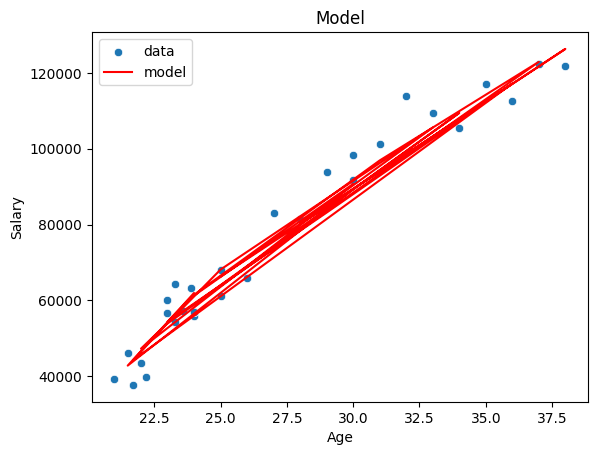

In [49]:
sns.scatterplot(data=df,x='Age',y='Salary',label='data')
plt.plot(x_train[:,1],y_pred_train,'r',label='model')
plt.title('Model')
plt.legend()

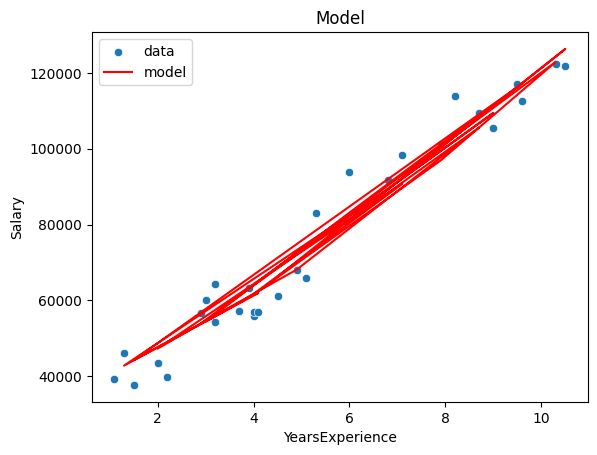

In [50]:
sns.scatterplot(data=df,x='YearsExperience',y='Salary',label='data')
plt.plot(x_train[:,0],y_pred_train,'r',label='model')
plt.title('Model')
plt.legend()

as we see the fits the data well